<a href="https://colab.research.google.com/github/giseldo/previsao_eleicao_deputados/blob/main/previsao_vitoria_canidatos_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aluno Giseldo da Silva

Fonte: https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import sklearn.metrics

from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn import tree

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef, make_scorer, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

# Pré-processamento

 - Carregando os dados
 - Tratamento dos dados com dummy nas variáveis categóricas

In [40]:
df = pd.read_csv("/content/drive/MyDrive/AA DATA2/train.csv") 

# teste real só será utilizado para gerar o arquivo com as respostas
df_test_real = pd.read_csv("/content/drive/MyDrive/AA DATA2/test_real.csv") 

qtd_treino = df.count()[0]

junta_tudo = [df, df_test_real]
df = pd.concat(junta_tudo,  ignore_index=True)
qtd_total = df.count()[0]

df = df.drop(["ano", "sequencial_candidato", "nome"], axis=1) # apagando colunas que não auxiliam na predição
df = pd.get_dummies(df, columns = ["uf", "partido", "cargo", "sexo", "grau", "estado_civil", "ocupacao"])  # lidando com as variaveis categoricas

#numeric_feats = df.dtypes[df.dtypes != "object"].index
#skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) # compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index
#df[skewed_feats] = np.log1p(df[skewed_feats])

# retornando os datasets
df_test_real = df.loc[qtd_treino:qtd_total]
df = df.loc[0:qtd_treino-1]

#### dados de testeq ue serao utilizados no final
test_X_final = df_test_real.drop(["situacao"], axis = 1)
####

df_tudo_train_y = df[["situacao"]]
df_tudo_train_X = df.drop(["situacao"], axis = 1)

le = LabelEncoder()
le.fit(df_tudo_train_y.situacao)
df_tudo_train_y = le.transform(df_tudo_train_y.situacao)

train, test = train_test_split(df, train_size=0.8) # separação entre treino e teste  

train_y = train[["situacao"]]
train_X = train.drop(["situacao"], axis = 1)

test_y = test[["situacao"]]
test_X = test.drop(["situacao"], axis = 1)

le.fit(train_y.situacao)
train_y = le.transform(train_y.situacao)

le.fit(test_y.situacao)
test_y = le.transform(test_y.situacao)


,situacao
0,nao_eleito
1,nao_eleito
2,eleito
3,nao_eleito
4,eleito
...,...
7617,nao_eleito
7618,nao_eleito
7619,nao_eleito
7620,nao_eleito


[1 1 0 ... 1 1 1]


In [90]:
train_X.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
2408,73,67,268332.70,3675.79,35277.70,25430.00,95000.0,12625.0,100000.0,175,...,0,0,0,0,0,0,0,0,0,0
2226,1,1,240.00,240.00,0.00,240.00,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1152,11,8,25300.00,2300.00,0.00,1300.00,7000.0,0.0,17000.0,71,...,0,0,0,0,0,0,0,0,0,0
4335,2,2,807.65,403.82,807.65,0.00,0.0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
3075,4,4,3708.07,927.02,0.00,2208.07,0.0,1500.0,0.0,23,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df.situacao.value_counts())
print("\nEleitos representam {:.4f}% do dataset.\n".format((df[df.situacao == "eleito"].shape[0] / df.shape[0]) * 100))
df.groupby("situacao").size()

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

Eleitos representam 13.4610% do dataset.



situacao
eleito        1026
nao_eleito    6596
dtype: int64

# Questão 1

- P: Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? 
### R: Sim, Temos um dataset desbalanceado com mais classes do tipo "não eleito". mais ou menos 5 para 1, do que para o "eleito".

- P: Em que proporção? 
### R: Mais de 5 para 1, (eleito 1026 e nao_eleito 6596) ou seja a cada 1 eleito temos quase 6 não eleitos. Eleitos representam 13.4593% do dataset.

- P: Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador?
### R: Alguns algoritmos de ML tem dificuldade em em induzir um bom modelo a partir de conjutos de dados desbalanceados. Se classificarmos com dados da classe desbalanceados, os algoritmos podem não diferenciar  a classe minoritária das demais categorias, acreditando que estão agregando resultado devido à aparente alta acurácia. Essa falta de diferenciação pode ocasionar problemas visto que geralmente a classe minoritária é o cerne da questão, como no nosso caso, quem foi eleito.

- P: Como você poderia tratar isso? (10 pt.)
### R: Pode ser utilizado as técnicas de "Reestruturação dos dados". Dentro das ténicas de "Reestruturação de dados" pode ser feito o "Undersamplig", que é reduzir a distribuição dos dados das observações da classe majoritária, para tentar igualar a quantidade. Isso pode ser feito com "Random Undersamplig", que é a retirada aleatória de observações da classe majoritária, ou "Fusão" que é unir duas ou mais observações da classe majoritária para uma menor perda de informação. Outra forma é o Oversampling consite em criar novas observações da classe minoritária com o objetivo de igualar a proporção das categorias. Outra opção é escolher um algoritmo mais resilente, coletar mais dados e usar modelos penalizados ou utilizar outras métricas para treino.


Fonte: https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b



# Questão 2 

Treine: 
- P: 2.1 - um modelo de regressão logística 
### R: Treinado
- 2.2 - uma árvore de decisão
### R: Treinado
- 2.3 - um modelo de adaboost
### R: Treinado
- 2.4 - um modelo de random forest e 
### R: Treinado
-3 2.5 - um modelo de gradient boosting.  
### R: Treinado
- 2.6 - Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (10 pts.)

# Antes do balanceamento

### Cross Validation

In [17]:
models = []
results = []
media = pd.DataFrame("nome": ["teste"], {"precisao": [0.5]})
names = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("DecisionTreeClassifier", tree.DecisionTreeClassifier())) ##
models.append(("AdaBoostClassifier", AdaBoostClassifier())) ##
models.append(("RandomForestClassifier", RandomForestClassifier())) ##
models.append(("GradientBoostingClassifier", GradientBoostingClassifier())) ##
models.append(("SVM", svm.SVC())) ##

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, df_tudo_train_X, df_tudo_train_y, cv = kfold, scoring="precision")
    results.append(cv_results)
    linha = pd.DataFrame({"nome":[name], "precisao": [cv_results.mean()]})
    media = pd.concat([media, linha], ignore_index=True)
    names.append(name)
    print("%s: %f precision with a standard deviation of %f" % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression: 0.922313 precision with a standard deviation of 0.041307
DecisionTreeClassifier: 0.940815 precision with a standard deviation of 0.027764
AdaBoostClassifier: 0.950358 precision with a standard deviation of 0.029421
RandomForestClassifier: 0.948875 precision with a standard deviation of 0.035886
GradientBoostingClassifier: 0.951903 precision with a standard deviation of 0.030712
SVM: 0.937534 precision with a standard deviation of 0.038149


In [32]:
media

,precisao,nome
0,0.500000,teste
1,0.922313,LogisticRegression
2,0.940815,DecisionTreeClassifier
3,0.950358,AdaBoostClassifier
4,0.948875,RandomForestClassifier
5,0.951903,GradientBoostingClassifier
6,0.937534,SVM


### R: Com o Crosvalidation então o GradienBoosting é o modelo que tem a melhor precisão 

### Sem crossvalidation

In [33]:
resultado = pd.DataFrame({"Teste": [0.5, 0.5, 0.5, 0.5]}, index = ["Precision", "Recall", "F-Measure","None"])
models = []
names = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("DecisionTreeClassifier", tree.DecisionTreeClassifier())) ##
models.append(("AdaBoostClassifier", AdaBoostClassifier())) ##
models.append(("RandomForestClassifier", RandomForestClassifier())) ##
models.append(("GradientBoostingClassifier", GradientBoostingClassifier())) ##
models.append(("SVM", svm.SVC())) ##

for name, model in models:
    model.fit(train_X, train_y)
    y_pred_train = model.predict(train_X)
    y_pred_test = model.predict(test_X)

    res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
    resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=[name + "Treino"])
    extracted_col = resultado_df[name + "Treino"]

    res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
    resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=[name + "Teste"])
    extracted_col2 = resultado_df2[name + "Teste"]

    resultado = resultado.join(extracted_col)
    resultado = resultado.join(extracted_col2)
resultado

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Teste,LogisticRegressionTreino,LogisticRegressionTeste,DecisionTreeClassifierTreino,DecisionTreeClassifierTeste,AdaBoostClassifierTreino,AdaBoostClassifierTeste,RandomForestClassifierTreino,RandomForestClassifierTeste,GradientBoostingClassifierTreino,GradientBoostingClassifierTeste,SVMTreino,SVMTeste
Precision,0.5,0.809069,0.847714,1.0,0.779108,0.848960,0.832974,1.0,0.854680,0.897969,0.850708,0.822650,0.858585
Recall,0.5,0.719394,0.710360,1.0,0.753519,0.826579,0.797230,1.0,0.813813,0.878889,0.821287,0.777843,0.770737
F-Measure,0.5,0.753124,0.754489,1.0,0.765300,0.837216,0.813506,1.0,0.832311,0.888086,0.834989,0.797750,0.805480
None,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


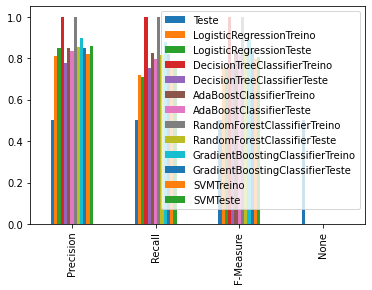

In [34]:
resultado.plot.bar()

# Questão 3
- P: 3 - Reporte precision, recall e f-measure no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. (10 pt.)
### R: Sim há uma boa diferença, porém analisando os dados percebe-se que no treino os modelos DecisionTree e RandomForest no treino apontam 1.0 para precision, recall e f-score, apontando o paradoxo da acurrácia por causa do desbalanceamento das classes. Não levando em consideração este fato o modelo Gradient Boost, conforme graficos abaixos e tabela acima é o modelo que teve melhores indicadores (precision e f-score) nos dados de teste entre os modelos.

- R: Decision Tree e Randon Forest foram melhores na métrica "Precisão" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: Decision Tree e Randon Forest foram melhores na métrica "Recall" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: Decision Tree e Randon Forest foram melhores na métrica "F-Measure" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: Logist Regression foi melhor para "Precision" para os dados desbalanceados no Teste
- R: Gradient Boost foi melhor no Teste para "Recall" para os dados desbalanceados no Teste
- R: Gradient Boost foi melhor no Teste para "F-Measure" para os dados desbalanceados no Teste

In [35]:
resultado

,Teste,LogisticRegressionTreino,LogisticRegressionTeste,DecisionTreeClassifierTreino,DecisionTreeClassifierTeste,AdaBoostClassifierTreino,AdaBoostClassifierTeste,RandomForestClassifierTreino,RandomForestClassifierTeste,GradientBoostingClassifierTreino,GradientBoostingClassifierTeste,SVMTreino,SVMTeste
Precision,0.5,0.809069,0.847714,1.0,0.779108,0.848960,0.832974,1.0,0.854680,0.897969,0.850708,0.822650,0.858585
Recall,0.5,0.719394,0.710360,1.0,0.753519,0.826579,0.797230,1.0,0.813813,0.878889,0.821287,0.777843,0.770737
F-Measure,0.5,0.753124,0.754489,1.0,0.765300,0.837216,0.813506,1.0,0.832311,0.888086,0.834989,0.797750,0.805480
None,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


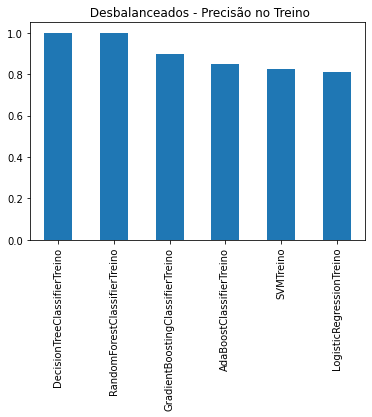

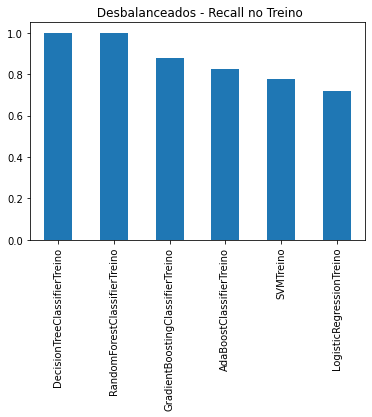

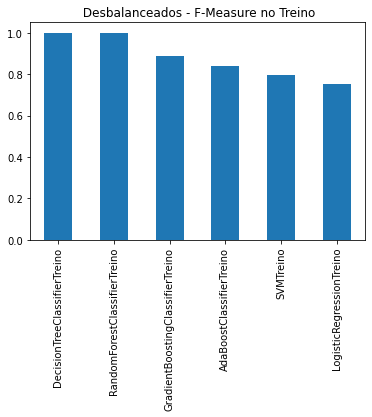

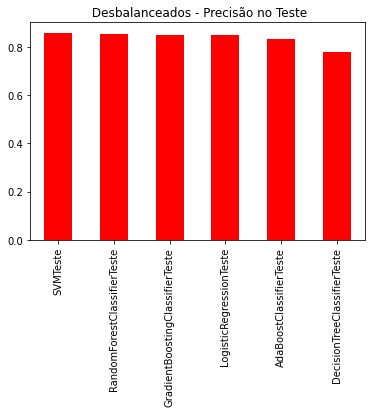

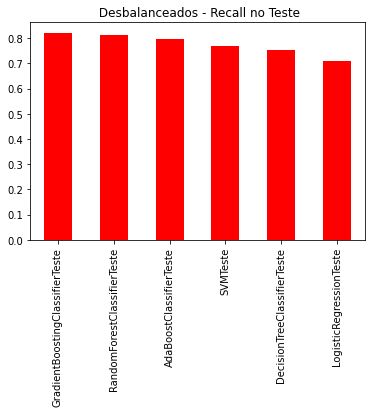

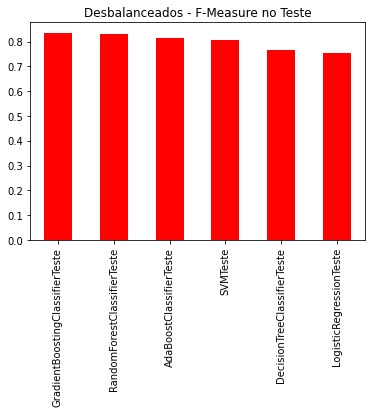

In [38]:
resultado.loc["Precision", ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Treino")
plt.show()
resultado.loc["Recall", ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Treino" )
plt.show()
resultado.loc["F-Measure",  ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - F-Measure no Treino")
plt.show()
resultado.loc["Precision", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Teste", color = "red")
plt.show()
resultado.loc["Recall", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Teste", color = "red")
plt.show()
resultado.loc["F-Measure", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = "Desbalanceados - F-Measure no Teste", color = "red")
plt.show()

# Questão 4
- P: 4 - Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)
### R: Com os dados desbalanceados temos no treino o efeito do "paradoxo da acurácia". Os dados são inconclusivos dado o desbalanceamento que fez com que os modelos DT e RF tivesse precisão máxima.
### TODO: OS Atributos tem que ser idenficados

# Questão 6
- P: 6 - Experimente outros modelos (e.g. SVM, RandomForests e GradientBoosting).
### R: Os 3 modelos já foram utilizados vide acima

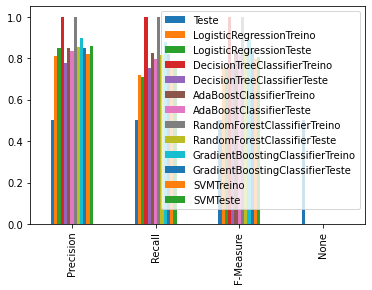

In [39]:
resultado.plot.bar()

# Depois do balanceamento

# Questão 7 
- 7 - Experimente balancear as classes,  caso estejam desbalanceadas.
### R: Foi realizado o Balanceamento com "Under-Sampling" da coluna "situacao" conforme resultados reportados abaixo.
### Balenceamento das classe: Under-Sampling

In [4]:
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(train_X, train_y)
print(pd.Series(y_res).value_counts())
#sns.countplot(x=y_res)

0    831
1    831
dtype: int64


In [5]:
resultado = pd.DataFrame({"Teste": [0.5, 0.5, 0.5, 0.5]}, index = ["Precision", "Recall", "F-Measure","None"])
models = []
names = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("DecisionTreeClassifier", tree.DecisionTreeClassifier())) ##
models.append(("AdaBoostClassifier", AdaBoostClassifier())) ##
models.append(("RandomForestClassifier", RandomForestClassifier())) ##
models.append(("GradientBoostingClassifier", GradientBoostingClassifier())) ##
models.append(("SVM", svm.SVC())) ##

for name, model in models:
    model.fit(x_res, y_res)
    y_pred_train = model.predict(x_res)
    y_pred_test = model.predict(test_X)

    res =  precision_recall_fscore_support(y_res, y_pred_train, average="macro")
    resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=[name + "Treino"])
    extracted_col = resultado_df[name + "Treino"]

    res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
    resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=[name + "Teste"])
    extracted_col2 = resultado_df2[name + "Teste"]

    resultado = resultado.join(extracted_col)
    resultado = resultado.join(extracted_col2)

resultado

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Teste,LogisticRegressionTreino,LogisticRegressionTeste,DecisionTreeClassifierTreino,DecisionTreeClassifierTeste,AdaBoostClassifierTreino,AdaBoostClassifierTeste,RandomForestClassifierTreino,RandomForestClassifierTeste,GradientBoostingClassifierTreino,GradientBoostingClassifierTeste,SVMTreino,SVMTeste
Precision,0.5,0.895694,0.700190,1.0,0.733911,0.933774,0.756675,0.999399,0.750619,0.958396,0.760461,0.905795,0.760650
Recall,0.5,0.886883,0.875795,1.0,0.867168,0.932010,0.908637,0.999398,0.911442,0.957280,0.910517,0.905535,0.896327
F-Measure,0.5,0.886250,0.728237,1.0,0.772724,0.931940,0.800623,0.999398,0.794152,0.957254,0.804794,0.905520,0.803281
None,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


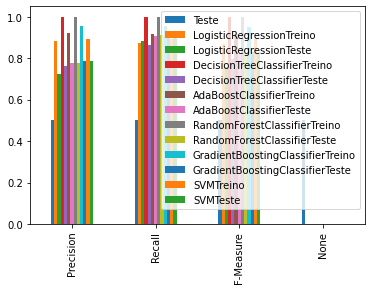

In [45]:
resultado.plot.bar()

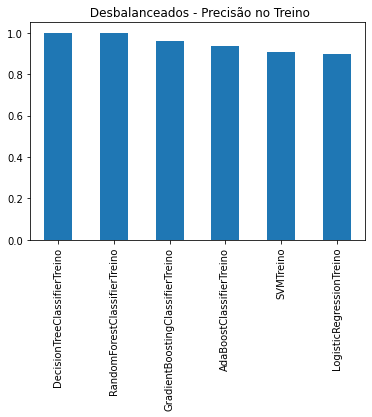

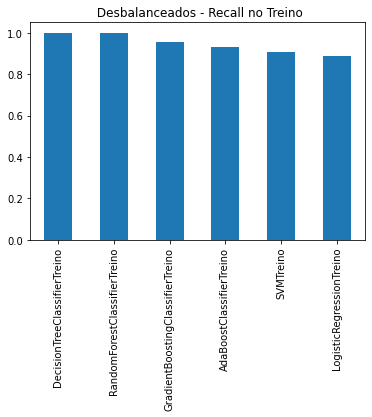

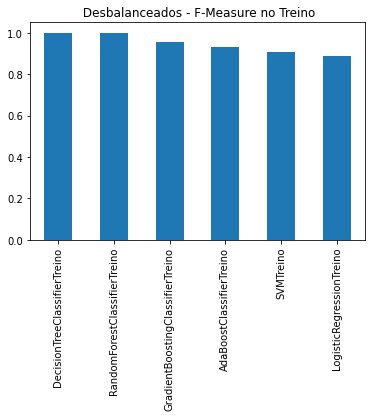

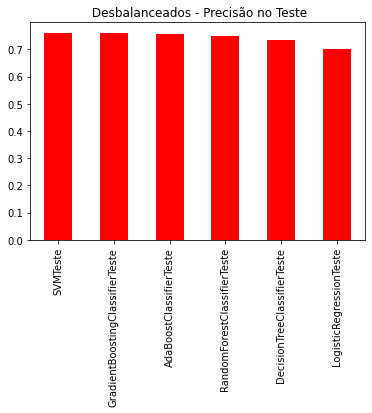

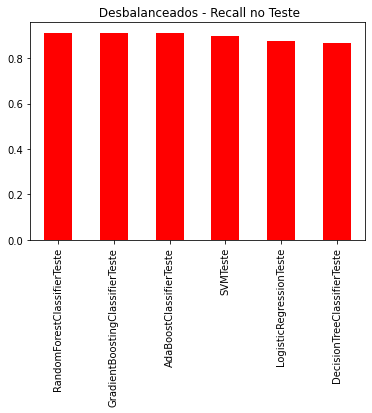

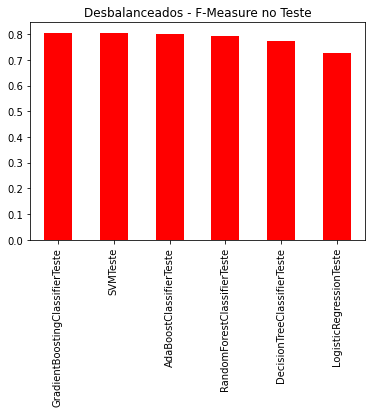

In [6]:
resultado.loc["Precision", ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Treino")
plt.show()
resultado.loc["Recall", ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Treino" )
plt.show()
resultado.loc["F-Measure",  ["LogisticRegressionTreino", "DecisionTreeClassifierTreino", "AdaBoostClassifierTreino", "RandomForestClassifierTreino", "GradientBoostingClassifierTreino", "SVMTreino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - F-Measure no Treino")
plt.show()
resultado.loc["Precision", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Teste", color = "red")
plt.show()
resultado.loc["Recall", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Teste", color = "red")
plt.show()
resultado.loc["F-Measure", ["LogisticRegressionTeste", "DecisionTreeClassifierTeste", "AdaBoostClassifierTeste", "RandomForestClassifierTeste", "GradientBoostingClassifierTeste", "SVMTeste"]].sort_values(ascending = False).plot.bar(title = "Desbalanceados - F-Measure no Teste", color = "red")
plt.show()

- R: Decision Tree e Randon Forest foram melhores na métrica "Precisão" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: Decision Tree e Randon Forest foram melhores na métrica "Recall" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: Decision Tree e Randon Forest foram melhores na métrica "F-Measure" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino
- R: SVM foi melhor para "Precision" para os dados desbalanceados no Teste
- R: Random Forest foi melhor no Teste para "Recall" para os dados desbalanceados no Teste
- R: Gradient Boost foi melhor no Teste para "F-Measure" para os dados desbalanceados no Teste

# Questão 4
- 4 - Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)
### R: Depois do Balanceamento: "Randon Forest" no "Treino" teve uma melhor Precisão, Recall e F-Measure. Já "Gradient Boost" teve melhor Precisão, Recall e F-Measure no "Test".


# Questão 5
- 5 - Envie seus melhores modelos conforme resultados nos dados de teste. Sugestões para melhorar o modelo: (10 pts.)
### R: O Melhor modelo é o Decision Tree no Treino e o SVM no Test, depois do balanceamento, conforme tabela abaixo. 
### R: Sugestão 1: Uma sugestão para melhorar o modelo é no lugar de utilizar dummies, utilizar one-hot enconding e compara o resultado.
### R: Sugestão 2: Uma sugestão é normalizar as features preditoras.

# Resultado do Melhor Modelo, Gradient Boost com todos os dados para gerar os resultados da submissão
### R: Logo o Gradient Boost teve o melhor resultado para o F-Measure nos dados do Teste depois do balanceamento, portanto sendo o algoritmo escolhido.

### Arquivo com a predição : Gerando o arquivo result submission com o resultado da predição dos anos de 2014

In [44]:
#treinando com todo os dados de teste reais
clf = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10)
clf.fit(df_tudo_train_X, df_tudo_train_y)
y_pred_test_final = clf.predict(test_X_final)

panda_df = pd.DataFrame(data = y_pred_test_final.astype(str), columns = ["situacao"])
panda_df["situacao"] = panda_df["situacao"].apply(lambda x: x.replace('0','eleito').replace('1', 'nao_eleito'))
df_test_real__ = pd.read_csv("/content/drive/MyDrive/AA DATA2/test_real.csv") 
solution = pd.DataFrame({"ID": df_test_real__.sequencial_candidato,"Predicted": panda_df["situacao"].astype(str)})
solution.to_csv("result_submission.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Tunagem de Hyperparâmetros dos modelos para identificar os melhores parâmetros


## AdaBoost

In [32]:
clf = AdaBoostClassifier()
parametros = {'n_estimators':[1, 5, 10],
              'learning_rate':[0.1, 1, 2]}
grid = GridSearchCV(estimator = clf,
                    param_grid = parametros,
                    scoring = "precision",
                    cv = 20)
grid.fit(train_X, train_y)
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score'].so]

,params,rank_test_score,mean_test_score
0,"{'learning_rate': 0.1, 'n_estimators': 1}",1,0.975926
1,"{'learning_rate': 0.1, 'n_estimators': 5}",4,0.975778
2,"{'learning_rate': 0.1, 'n_estimators': 10}",6,0.969314
3,"{'learning_rate': 1, 'n_estimators': 1}",1,0.975926
4,"{'learning_rate': 1, 'n_estimators': 5}",7,0.968406
5,"{'learning_rate': 1, 'n_estimators': 10}",8,0.954931
6,"{'learning_rate': 2, 'n_estimators': 1}",1,0.975926
7,"{'learning_rate': 2, 'n_estimators': 5}",5,0.971899
8,"{'learning_rate': 2, 'n_estimators': 10}",9,0.422013


In [35]:
clf = AdaBoostClassifier(n_estimators=1, learning_rate=1) # {'learning_rate': 1, 'n_estimators': 1}	1	0.975926
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68       205
           1       0.98      0.89      0.93      1320

    accuracy                           0.89      1525
   macro avg       0.77      0.89      0.81      1525
weighted avg       0.92      0.89      0.90      1525



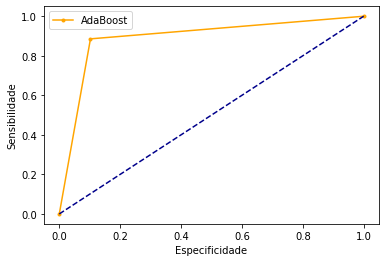

In [37]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='AdaBoost', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()

In [ ]:
clf.best_params_

## Gradient Boosting
https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression


In [11]:
clf = GradientBoostingClassifier()

#parametros = {
#    "loss":["deviance"],
#    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#    "min_samples_split": np.linspace(0.1, 0.5, 12),
#    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#    "max_depth":[3,5,8],
#    "max_features":["log2","sqrt"],
#    "criterion": ["friedman_mse",  "mae"],
#    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#    "n_estimators":[10]
#    }

parametros = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "n_estimators":[10]
    }
grid = GridSearchCV(estimator = clf,
                    param_grid = parametros,
                    scoring = "precision",
                    cv = 10)

grid.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'n_estimators': [10]},
             scoring='precision')

In [16]:
y_pred = grid.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       220
           1       0.93      0.97      0.95      1305

    accuracy                           0.92      1525
   macro avg       0.85      0.78      0.81      1525
weighted avg       0.91      0.92      0.91      1525



In [17]:
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 10}",5,0.867804
1,"{'learning_rate': 0.025, 'n_estimators': 10}",5,0.867804
2,"{'learning_rate': 0.05, 'n_estimators': 10}",5,0.867804
3,"{'learning_rate': 0.075, 'n_estimators': 10}",4,0.888123
4,"{'learning_rate': 0.1, 'n_estimators': 10}",3,0.920853
5,"{'learning_rate': 0.15, 'n_estimators': 10}",2,0.936030
6,"{'learning_rate': 0.2, 'n_estimators': 10}",1,0.945961


In [15]:
print(grid.score(train_X, train_y))
print(grid.best_params_)

0.9476313841598816
{'learning_rate': 0.2, 'n_estimators': 10}


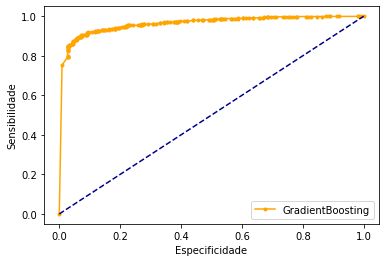

In [24]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='GradientBoosting', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()

## RandomForestClassifier
https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

In [ ]:
clf = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

grid.fit(train_X, train_y)

In [ ]:
y_pred = clf.predict(test_X)
print(classification_report(test_y, y_pred))

In [ ]:
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
print(clf.score(train_X, train_y))
print(clf.best_params_)

In [ ]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='RandomForest', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()

## Decision Tree
https://www.kaggle.com/code/fermatsavant/decision-tree-high-acc-using-gridsearchcv

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=1024)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
grid.fit(train_X, train_y)

In [ ]:
y_pred = clf.predict(test_X)
print(classification_report(test_y, y_pred))

In [ ]:
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
print(clf.score(train_X, train_y))
print(clf.best_params_)

In [ ]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='DecisionTree', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()

##SVM
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [ ]:
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(train_X, train_y)

In [ ]:
y_pred = clf.predict(test_X)
print(classification_report(test_y, y_pred))

In [ ]:
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
print(clf.score(train_X, train_y))
print(clf.best_params_)

In [ ]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='SVM', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()

## Logistic Regression
https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27


In [ ]:
clf = LogisticRegression()

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

grid = GridSearchCV(clf, param_grid = parameters, cv=10) 
grid.fit(train_X, train_y)


In [ ]:
y_pred = clf.predict(test_X)
print(classification_report(test_y, y_pred))

In [ ]:
pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
print(clf.score(train_X, train_y))
print(clf.best_params_)

In [ ]:
y_pred_prob = clf.predict_proba(test_X)
probs = y_pred_prob[:, 1]
rfp, rvp, lim = roc_curve(test_y, probs)
plt.plot(rfp, rvp, marker = '.', label='LogisticRegression', color="orange")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--')
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.legend()
plt.show()